In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("data.csv") 

In [12]:
midcpnifty_data = df[df['underlying'] == 'MIDCPNIFTY']

In [13]:
buy_data = midcpnifty_data[midcpnifty_data['side'] == 'BUY']
sell_data = midcpnifty_data[midcpnifty_data['side'] == 'SELL']

In [14]:
buy_data = buy_data.sort_values('time')
sell_data = sell_data.sort_values('time')

In [15]:
buy_data['cumulative_qty'] = buy_data['Qty'].cumsum()
sell_data['cumulative_qty'] = sell_data['Qty'].cumsum()
buy_data['PnL'] = buy_data['cumulative_qty'] * buy_data['Price']
sell_data['PnL'] = sell_data['cumulative_qty'] * sell_data['Price']

In [16]:
combined_pnl = pd.concat([buy_data[['time', 'PnL']], sell_data[['time', 'PnL']]])

In [17]:
combined_pnl = combined_pnl.groupby('time').sum()

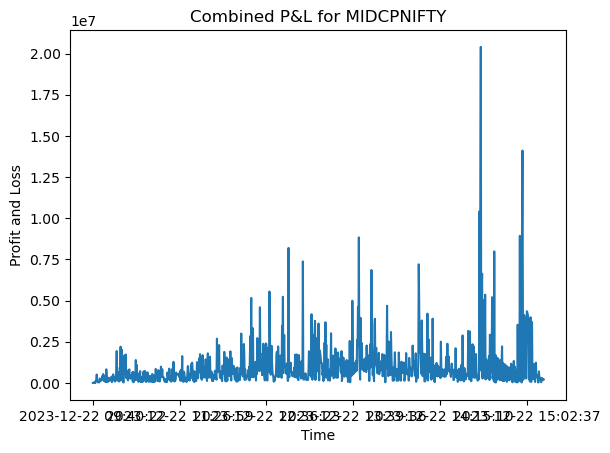

In [18]:
combined_pnl['PnL'].plot(title='Combined P&L for MIDCPNIFTY', xlabel='Time', ylabel='Profit and Loss')
plt.show()